In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns            # for better theme

In [32]:
data = pd.read_csv("../BTC_99.csv").set_index("date").truncate(after = "2023-05-28 16:00:00")
data.index = pd.to_datetime(data.index)

data['mid'] = data['close'].rolling(window=20).mean()
data['std'] = data['close'].rolling(window=20).std()

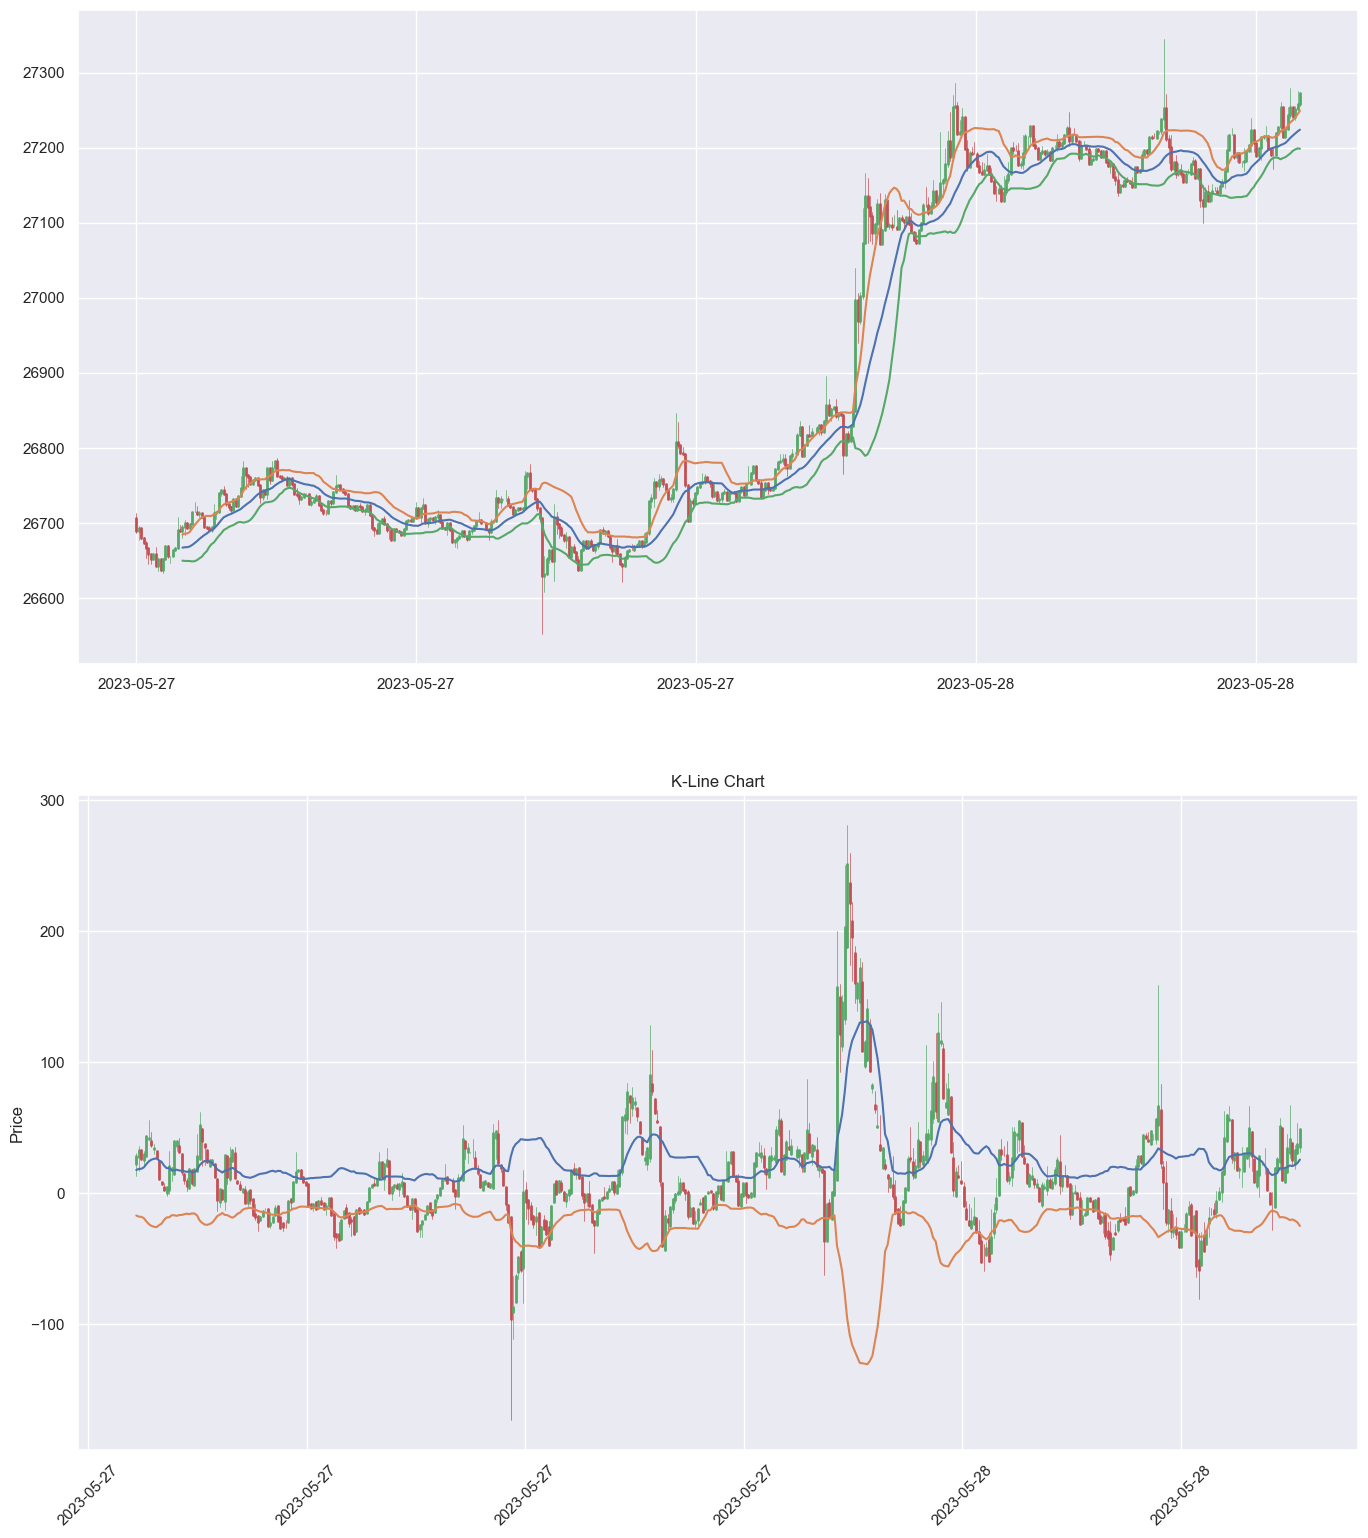

In [52]:

sns.set(style="dark")

# 创建一个Figure和一个Axes
fig, ax = plt.subplots(2,1)

# 绘制K线图
# 使用candlestick_ohlc函数绘制K线图
ax[0].grid(True)
ax[0].xaxis_date()  # x轴显示日期
ax[1].grid(True)
ax[1].xaxis_date()  # x轴显示日期

# 遍历数据并绘制K线图
for index, row in data.iterrows():
    ax[0].plot([index, index], [row['low'], row['high']], color="g" if row['close'] >= row['open'] else "r", linewidth=0.5)
    ax[0].plot([index, index], [row['open'], row['close']], color="g" if row['close'] >= row['open'] else "r", linewidth=2)
    
ax[0].plot(data.index, data["mid"])
ax[0].plot(data.index, data["mid"]+data["std"])
ax[0].plot(data.index, data["mid"]-data["std"])

for index, row in data.iterrows():
    ax[1].plot([index, index], [row['low']-row["mid"], row['high']-row["mid"]], color="g" if row['close'] >= row['open'] else "r", linewidth=0.5)
    ax[1].plot([index, index], [row['open']-row["mid"], row['close']-row["mid"]], color="g" if row['close'] >= row['open'] else "r", linewidth=2)

ax[1].plot(data.index,  data["std"])
ax[1].plot(data.index, -data["std"])
    
    
# 设置x轴标签为日期格式
ax[0].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax[0].xaxis.set_major_locator(plt.MaxNLocator(nbins=6))
ax[1].xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y-%m-%d'))
ax[1].xaxis.set_major_locator(plt.MaxNLocator(nbins=6))

# 设置x轴标签旋转45度，使其更好地显示
plt.xticks(rotation=45)

# 设置y轴标签
plt.ylabel('Price')

# 设置图表标题
plt.title('K-Line Chart')

# 显示图表
plt.subplots_adjust(left=0, right=2, bottom = 0, top= 3)
plt.show()